In [1]:
!pip install python-chess

     ---------------------------------------- 0.0/156.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/156.5 kB ? eta -:--:--
     ---- -------------------------------- 20.5/156.5 kB 162.5 kB/s eta 0:00:01
     ------- ----------------------------- 30.7/156.5 kB 217.9 kB/s eta 0:00:01
     ---------------- -------------------- 71.7/156.5 kB 391.3 kB/s eta 0:00:01
     ------------------------------------ 156.5/156.5 kB 778.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for chess: filename=chess-1.11.1-py3-none-any.whl size=148535 sha256=97ae5257fb43fa1568b3bd75aee6bfe7b320ed2b174d2831211d34276cc9a357
  Stored in directory: c:\users\j.paul\appdata\local\pip\cache\wheels\84\8b\6c\94b05653eadf8766c01d0ccc56e866c570346c5ea36b3db6f3
Successfully built chess


In [31]:
import chess
import chess.pgn
import chess.engine
import matplotlib.pyplot as plt

In [25]:
from glob import glob
from io import StringIO

glob("*.exe")

['stockfish-windows-x86-64-avx2.exe',
 'stockfish-windows-x86-64-sse41-popcnt.exe']

In [35]:
def calculate_accuracy(pgn_moves, stockfish_path, max_deviation=2000):
    from io import StringIO  # Ensure this is imported

    # Initialize the chess engine
    engine = chess.engine.SimpleEngine.popen_uci(stockfish_path)
    
    # Parse the PGN moves
    pgn_io = StringIO(pgn_moves)  # Convert the string to a file-like object
    game = chess.pgn.read_game(pgn_io)
    board = game.board()
    
    accuracy_percentages = []
    
    for move in game.mainline_moves():
        # Position before the move
        info = engine.analyse(board, chess.engine.Limit(time=0.1))
        best_move = info["pv"][0]  # Engine's best move
        best_score = info["score"].relative.score() or 0
        
        # Make the move on the board
        board.push(move)
        new_info = engine.analyse(board, chess.engine.Limit(time=0.1))
        new_score = new_info["score"].relative.score() or 0
        
        # Score difference
        deviation = abs(new_score - best_score)
        
        # Convert to percentage
        accuracy = max(0, 100 - (deviation / max_deviation) * 100)
        accuracy_percentages.append(accuracy)
    
    engine.quit()
    
    # Aggregate accuracy: average percentage
    average_accuracy = sum(accuracy_percentages) / len(accuracy_percentages)
    return average_accuracy, accuracy_percentages

In [9]:
# Example usage
pgn_moves = """1. d4 d5 2. h3 Nc6 3. Nf3 Bf5 4. a3 h6 5. e3 a6 6. Nc3 Nf6 7. g4 Bg6 8. Bg2 Ne4 9. Bd2 Nxc3 
10. Bxc3 e6 11. Ne5 Nxe5 12. dxe5 f6 13. Qd4 f5 14. Qa4+ c6 15. O-O-O fxg4 16. hxg4 Be7 17. e4 O-O 
18. exd5 exd5 19. e6 Qd6 20. Kb1 Qxe6 21. Rde1 Qd6 22. Bb4 c5 23. Bd2 Rxf2 24. Qa5 Rxg2 25. Be3 b6 
26. Qa4 d4 27. Qc4+ Bf7 28. Qf1 Rxg4 29. Bxh6 Bf6 30. Qe2 Rg6 31. Bd2 Re8 32. Qh5 Rxe1+ 33. Bxe1 Rh6 
34. Qf3 Bd5 35. Bg3 Rxh1+ 36. Qxh1 Bxh1 37. Bxd6 Kf7 38. Kc1 Ke6 39. Bf4 g5 40. Bg3 g4 41. Kd2 Be5 
42. Bxe5 Kxe5 43. Ke2 Kf4 44. Kf2 g3+ 45. Kg1 Be4 46. c3 d3"""

In [17]:
stockfish_path = "stockfish-windows-x86-64-avx2.exe"
stockfish_path = "stockfish-windows-x86-64-sse41-popcnt.exe"

In [37]:
average_deviation, accuracy = calculate_accuracy(pgn_moves, stockfish_path)

In [39]:
average_accuracy, accuracy_percentages = calculate_accuracy(pgn_moves, stockfish_path)
print(f"Average Accuracy (Higher is better): {average_accuracy:.2f}%")
print(f"Move-by-Move Accuracy: {accuracy_percentages}")

Average Accuracy (Higher is better): 62.95%
Move-by-Move Accuracy: [97.15, 97.1, 98.7, 99.5, 97.85, 97.85, 98.0, 98.2, 98.15, 97.0, 99.1, 99.05, 97.7, 96.7, 94.35, 94.65, 94.3, 94.5, 95.6, 95.45, 95.45, 95.25, 95.35, 95.7, 94.9, 96.1, 97.85, 96.9, 98.1, 97.4, 93.8, 94.95, 97.4, 86.15, 81.65, 83.7, 76.2, 71.1, 75.55, 86.2, 93.45, 94.25, 87.4, 74.3, 65.6, 55.8, 49.9, 38.800000000000004, 35.95, 28.900000000000006, 33.85000000000001, 37.6, 33.39999999999999, 29.299999999999997, 23.450000000000003, 36.4, 54.85, 53.849999999999994, 51.15, 46.75, 40.7, 43.50000000000001, 39.65, 29.849999999999994, 28.60000000000001, 27.5, 27.049999999999997, 24.25, 10.950000000000003, 14.0, 27.349999999999994, 29.25, 30.400000000000006, 31.10000000000001, 28.700000000000003, 27.5, 26.5, 27.10000000000001, 24.0, 23.799999999999997, 24.200000000000003, 21.35000000000001, 19.099999999999994, 15.549999999999997, 12.549999999999997, 13.099999999999994, 12.200000000000003, 0, 35.85000000000001, 100.0, 100.0, 100.0]

In [49]:
%mkdir images

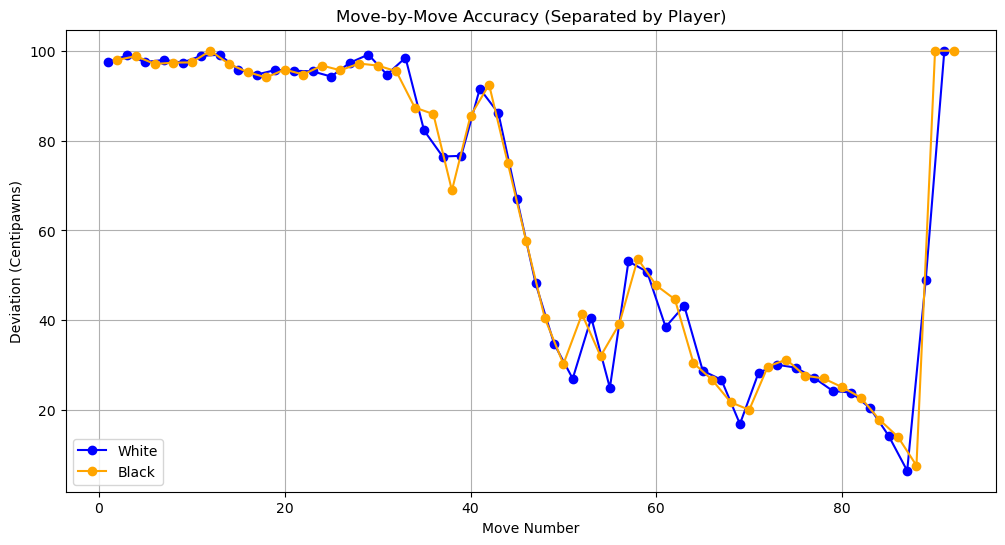

In [51]:
def plot_accuracy_by_player(accuracy):
    # Separate accuracy by player
    white_moves = accuracy[::2]  # Odd indices (White's moves)
    black_moves = accuracy[1::2]  # Even indices (Black's moves)
    
    # Create a plot for move-by-move accuracy
    plt.figure(figsize=(12, 6))
    
    # Plot White's moves
    plt.plot(range(1, len(accuracy) + 1, 2), white_moves, marker='o', label="White", color='blue')
    
    # Plot Black's moves
    plt.plot(range(2, len(accuracy) + 1, 2), black_moves, marker='o', label="Black", color='orange')
    
    # Add labels and title
    plt.title("Move-by-Move Accuracy (Separated by Player)")
    plt.xlabel("Move Number")
    plt.ylabel("Deviation (Centipawns)")
    plt.legend()
    plt.grid()

    plt.savefig("images/move_accuracy_plot.png")
    plt.show()

# Example usage
plot_accuracy_by_player(accuracy)